# **MÓDULO 17 - Projeto de Credit Score - Parte 1 - Processamento dos dados**


Essa é a primeira etapa do processo de Credit Score que vocês desenvolverão durante nosso curso.
Nessa primeira etapa vocês irão aplicar os passos aprendidos nos módulos de pré processamento para preparar a base de vocês para o desenvolvimento do modelo.

O termo "credit score" se refere a uma pontuação numérica que representa a credibilidade de um indivíduo em termos de cumprimento de obrigações financeiras, como pagar contas de empréstimos, cartões de crédito, entre outros. Essa pontuação é calculada com base em diversas informações financeiras e de crédito do indivíduo, como histórico de pagamentos, níveis de endividamento, tempo de crédito, tipos de crédito utilizados, entre outros.

O objetivo de um modelo de credit score é prever o risco de um indivíduo se tornar inadimplente com suas obrigações financeiras. Em outras palavras, o modelo avalia a probabilidade de um indivíduo não cumprir com os pagamentos de empréstimos ou outros compromissos financeiros. Essa previsão é fundamental para instituições financeiras, como bancos e credores, na tomada de decisão sobre a concessão de crédito. Um modelo de credit score eficaz pode ajudar essas instituições a avaliar o risco de emprestar dinheiro a um determinado indivíduo e, assim, tomar decisões mais informadas sobre a aprovação ou negação de crédito, bem como sobre os termos e condições desses empréstimos.

**Atenção:** Notem que esse projeto é diferente da base que tenho trabalhado com vocês em aula, apesar de se tratar de uma base bancária durante a aula falamos sobre a variável Churn a ser prevista, nesse caso a previsão seria do valor do Score de Crédito.

In [147]:
import seaborn as sns
import matplotlib.pyplot as plt
import pandas as pd
import plotly.express as px

In [148]:
#Lembrem-se sempre de alterar a importação dos dados de acordo com o diretório de vocês.
df = pd.read_csv("CREDIT_SCORE_PROJETO_PARTE1.csv", delimiter=';')

df.head(10)

,Age,Gender,Income,Education,Marital Status,Number of Children,Home Ownership,Credit Score
0,25.0,Female,"50.000,00",Bachelor's Degree,Single,0,Rented,High
1,30.0,Male,"100.000,00",Master's Degree,Married,2,Owned,High
2,35.0,Female,"75.000,00",Doctorate,Married,1,Owned,High
3,40.0,Male,"125.000,00",High School Diploma,Single,0,Owned,High
4,45.0,Female,"100.000,00",Bachelor's Degree,Married,3,Owned,High
5,50.0,Male,"150.000,00",Master's Degree,Married,0,Owned,High
6,26.0,Female,"40.000,00",Associate's Degree,Single,0,Rented,Average
7,31.0,Male,"60.000,00",Bachelor's Degree,Single,0,Rented,Average
8,NaN,Female,"80.000,00",Master's Degree,Married,2,Owned,High
9,NaN,Male,"105.000,00",Doctorate,Single,0,Owned,High


Legenda dos dados:

*   **Age** : Idade dos nossos clientes.

*   **Income** : Salário Mensal.

*   **Gender** : Gênero.

*   **Education** : Nível de escolaridade dos clientes.

*   **Marital** : Status Civilmente.

*   **Number of Children** : Quantidade de filhos.

*   **Home** : Tipo de residência, alugada ou própria.

*   **Credit Score** : Nossa variável preditora, o score de crédito dos clientes.


# Etapa 1: Relize os passos que vimos no módulo 18, de pré processamento dos dados.

**A) Verifique os tipos de dados, fazendo as transformações quando necessário.**


In [149]:
#A) seu código aqui
df.dtypes

Age                   float64
Gender                 object
Income                 object
Education              object
Marital Status         object
Number of Children      int64
Home Ownership         object
Credit Score           object
dtype: object

In [150]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 164 entries, 0 to 163
Data columns (total 8 columns):
 #   Column              Non-Null Count  Dtype  
---  ------              --------------  -----  
 0   Age                 130 non-null    float64
 1   Gender              164 non-null    object 
 2   Income              164 non-null    object 
 3   Education           164 non-null    object 
 4   Marital Status      164 non-null    object 
 5   Number of Children  164 non-null    int64  
 6   Home Ownership      164 non-null    object 
 7   Credit Score        164 non-null    object 
dtypes: float64(1), int64(1), object(6)
memory usage: 10.4+ KB


In [151]:
# De início já é possível observar que as variável Income possui inconsistências, pois espera-se que seja do tipo int ou float. Vamos ajustar isto.

In [152]:
df['Income'].unique()

array(['50.000,00', '100.000,00', '75.000,00', '125.000,00', '150.000,00',
       '40.000,00', '60.000,00', '80.000,00', '105.000,00', '90.000,00',
       '135.000,00', '35.000,00', '55.000,00', '70.000,00', '95.000,00',
       '85.000,00', '30.000,00', '65.000,00', '115.000,00', '25.000,00',
       '45.000,00', '130.000,00', '155.000,00', '110.000,00',
       '140.000,00', '37.500,00', '57.500,00', '72.500,00', '32.500,00',
       '52.500,00', '67.500,00', '92.500,00', '82.500,00', '122.500,00',
       '27.500,00', '47.500,00', '62.500,00', '87.500,00', '77.500,00',
       '112.500,00', '117.500,00', '142.500,00', '160.000,00',
       '97.500,00', '145.000,00', '162.500,00', '120.000,00',
       '102.500,00', '137.500,00', '127.500,00', '82.000,00', '68.000,00'],
      dtype=object)

In [153]:
# Mesmo que hoje os valores sejam inteiros, existe a chance de incluir decimais no futuro, portanto, trataremos esse variável para float.

In [154]:
df['Income'] = df['Income'].str.replace('.', '', regex=False)
df['Income'] = df['Income'].str.replace(',', '.', regex=False)
df['Income'] = df['Income'].astype(float)

In [155]:
df.dtypes

Age                   float64
Gender                 object
Income                float64
Education              object
Marital Status         object
Number of Children      int64
Home Ownership         object
Credit Score           object
dtype: object

In [156]:
df.head(2)

,Age,Gender,Income,Education,Marital Status,Number of Children,Home Ownership,Credit Score
0,25.0,Female,50000.0,Bachelor's Degree,Single,0,Rented,High
1,30.0,Male,100000.0,Master's Degree,Married,2,Owned,High


In [157]:
# É esperado que a variável 'Age' seja int, contudo, há valores nulos, que serão tratados na letra B)

**B) Verifique se temos colunas com dados faltantes.
Caso existam colunas com dados faltantes faça o tratamento desses dados, excluindo ou substituindo esses valores. Justifique sua escolha.**

In [158]:
#seu código aqui
# Conforme observado quando rodamos o df.info(), somente a variável Age possui valores faltantes.
(df.isnull().sum() / len(df)) * 100

Age                   20.731707
Gender                 0.000000
Income                 0.000000
Education              0.000000
Marital Status         0.000000
Number of Children     0.000000
Home Ownership         0.000000
Credit Score           0.000000
dtype: float64

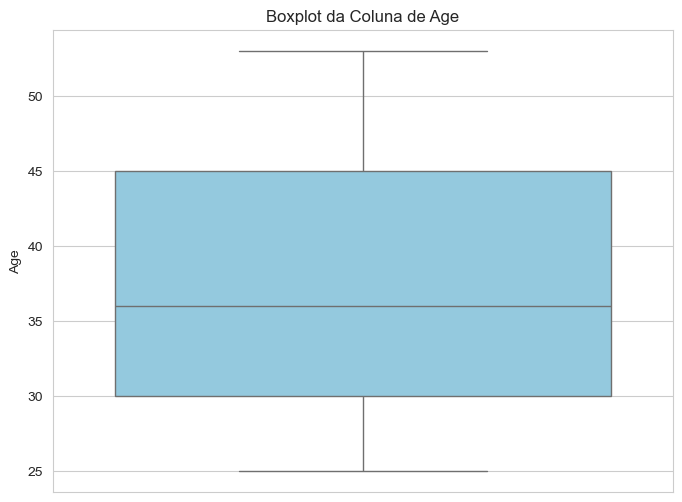

In [159]:
# Essa variável parece ser importante para o modelo, portanto, não é possível excluir a coluna. Teremos que tratá-la.
sns.set_style('whitegrid')
plt.figure(figsize=(8, 6))
sns.boxplot(data=df, y='Age', color='skyblue')
plt.title('Boxplot da Coluna de Age')
plt.ylabel('Age')
plt.show()

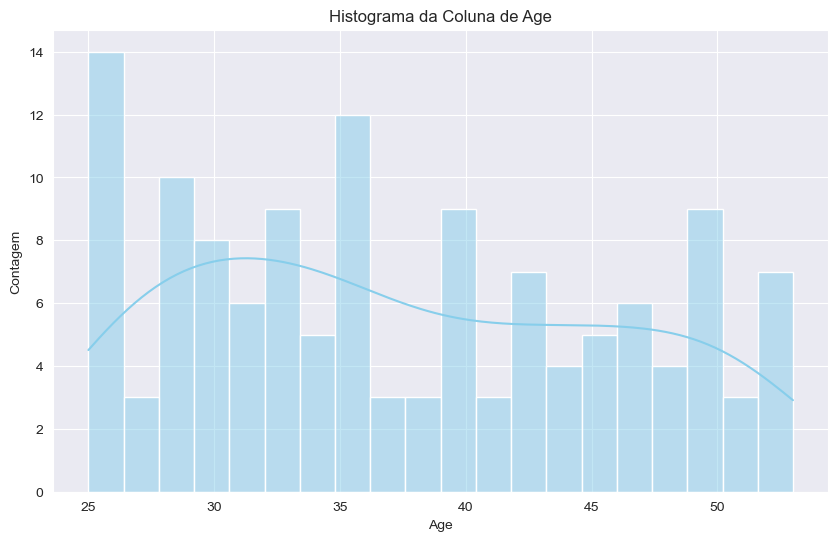

In [160]:
sns.set_style('darkgrid')
plt.figure(figsize=(10, 6))
sns.histplot(data=df, x='Age', bins=20, kde=True, color='skyblue')
plt.title('Histograma da Coluna de Age')
plt.xlabel('Age')
plt.ylabel('Contagem')
plt.show()

In [161]:
print('A média de Age é:' ,df['Age'].mean())
print('A mediana de Age é:' ,df['Age'].median())

A média de Age é: 37.50769230769231
A mediana de Age é: 36.0


In [162]:
# A variável Age possui aproximadamente 20% de valores nulos, excluir as linhas com nulos faria com que perdéssemos um percentual importante da base.
# Ao observarmos os gráficos de box plot, histograma e os valores da média e mediana, observamos que essa variável não possui outliers e que a mediana está muito próxima da média.
# Portanto, substituiremos os valores nulos pela mediana, visto que é um valor inteiro, ao contrário da média.
df['Age'] = df['Age'].fillna(df['Age'].median())

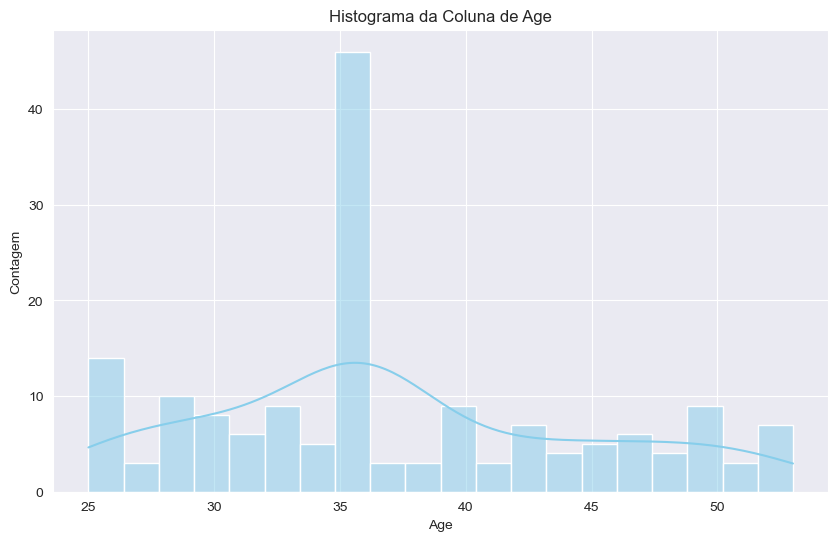

In [163]:
sns.set_style('darkgrid')
plt.figure(figsize=(10, 6))
sns.histplot(data=df, x='Age', bins=20, kde=True, color='skyblue')
plt.title('Histograma da Coluna de Age')
plt.xlabel('Age')
plt.ylabel('Contagem')
plt.show()

In [164]:
df['Age'] = df['Age'].astype(int)

In [165]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 164 entries, 0 to 163
Data columns (total 8 columns):
 #   Column              Non-Null Count  Dtype  
---  ------              --------------  -----  
 0   Age                 164 non-null    int32  
 1   Gender              164 non-null    object 
 2   Income              164 non-null    float64
 3   Education           164 non-null    object 
 4   Marital Status      164 non-null    object 
 5   Number of Children  164 non-null    int64  
 6   Home Ownership      164 non-null    object 
 7   Credit Score        164 non-null    object 
dtypes: float64(1), int32(1), int64(1), object(5)
memory usage: 9.7+ KB


**C) Verifique se temos valores digitados de forma incorreta nas variáveis categóricas que necessitem de tratamento.**

In [166]:
#seu código aqui
df['Gender'].unique()

array(['Female', 'Male'], dtype=object)

In [167]:
df['Education'].unique()

array(["Bachelor's Degree", "Master's Degree", 'Doctorate',
       'High School Diploma', "Associate's Degree"], dtype=object)

In [168]:
df['Marital Status'].unique()

array(['Single', 'Married'], dtype=object)

In [169]:
df['Home Ownership'].unique()

array(['Rented', 'Owned'], dtype=object)

In [170]:
df['Credit Score'].unique()

array(['High', 'Average', 'Low'], dtype=object)

In [171]:
# Não foram encotrados valores digitados de forma incorreta nas variáveis categóricas.

# Etapa 2: Relize os passos que vimos no módulo 15, de análise.

**A) Realiza a análise univariada, aplique a função describe ao nosso dataframe para verificar os dados das variáveis numéricas, se encontrar a possível presença de outliers analise com gráficos a distribuição dos dados.Traga insights sobre os dados analisados.**

In [172]:
#seu código aqui
df.describe()

,Age,Income,Number of Children
count,164.000000,164.000000,164.000000
mean,37.195122,83765.243902,0.652439
std,7.586619,32457.306728,0.883346
min,25.000000,25000.000000,0.000000
25%,31.750000,57500.000000,0.000000
50%,36.000000,83750.000000,0.000000
75%,43.000000,105000.000000,1.000000
max,53.000000,162500.000000,3.000000


In [173]:
# A variável Age, já tratada na questão anterior, apresenta uma média, 37,19, próxima à mediana e, conforme observado no boxplot, não possui outliers

In [174]:
# A variável Income também possui média, 83765, próxima à mediana, 83750. Vamos plotar um boxplot para analisar a presença de outliers.

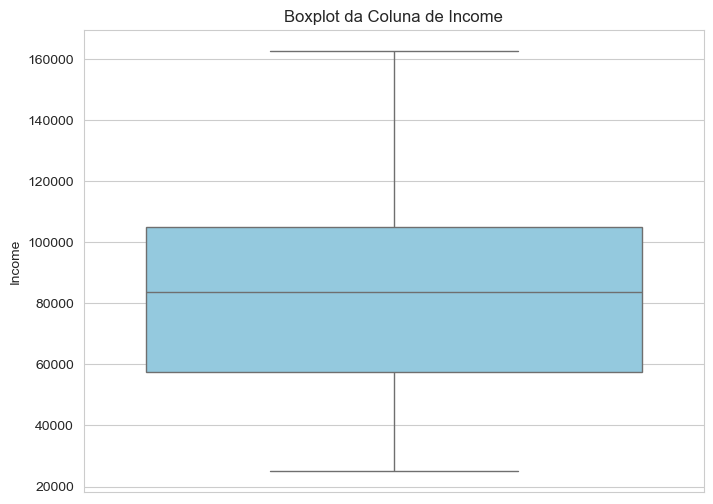

In [175]:
sns.set_style('whitegrid')
plt.figure(figsize=(8, 6))
sns.boxplot(data=df, y='Income', color='skyblue')
plt.title('Boxplot da Coluna de Income')
plt.ylabel('Income')
plt.show()
# Não foi possível observar outliers.

In [176]:
# A variável Number of Childer, contudo, apresenta uma mediana igual a zero e média igual a 0,65. Vamos analisar a distribuição dessa variável.

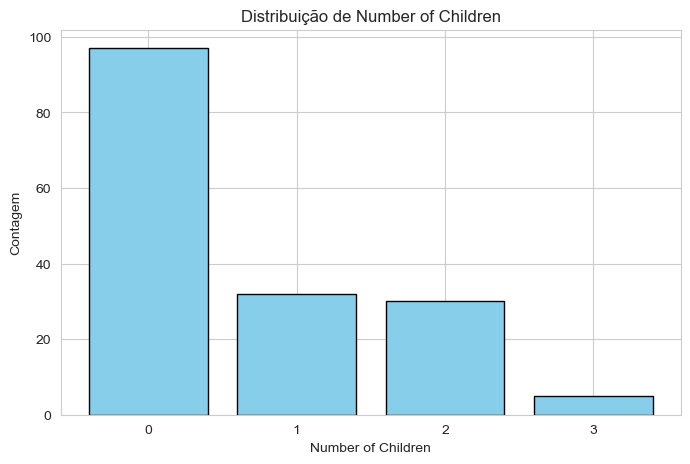

In [177]:
children_counts = df['Number of Children'].value_counts().sort_index()
plt.figure(figsize=(8, 5))
plt.bar(children_counts.index, children_counts.values, color='skyblue', edgecolor='black')
plt.title('Distribuição de Number of Children')
plt.xlabel('Number of Children')
plt.ylabel('Contagem')
plt.xticks(children_counts.index)
plt.show()

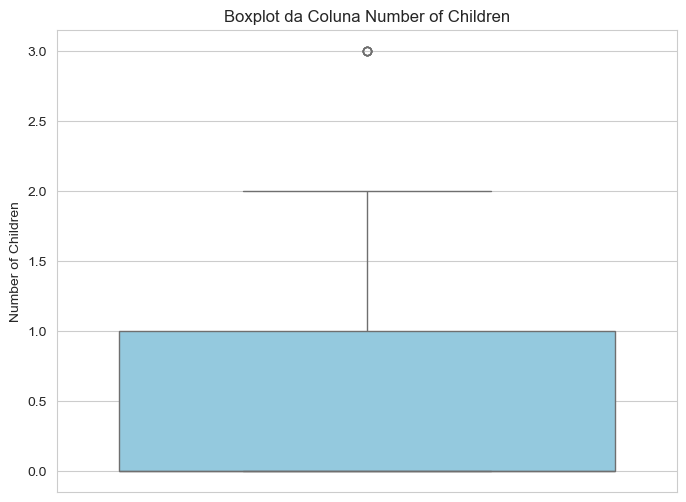

In [178]:
sns.set_style('whitegrid')
plt.figure(figsize=(8, 6))
sns.boxplot(data=df, y='Number of Children', color='skyblue')
plt.title('Boxplot da Coluna Number of Children')
plt.ylabel('Number of Children')
plt.show()

In [179]:
# Vamos verificar a distribuição das categorias
df['Number of Children'].value_counts(normalize=True) * 100

Number of Children
0    59.146341
1    19.512195
2    18.292683
3     3.048780
Name: proportion, dtype: float64

In [180]:
# Temos uma distribuição do número de filhos que varia de 0 a 3. Sendo que a maior parte da base não possui filhos e os que possuem 3 filhos representam apenas 3%.
# O box plot interpreta o número 3 como outlier, contudo, pensando criticamente, não faz sentido removermos por ser um valor muito próximo aos demais.
# Portanto, não faremos nenhuma alteração nessa variável.

**B) Agora realize a análise univariada para as variaveis categóricas, plote gráficos para entender a distribuição das categorias e tente retirar insights de cada gráfico.**

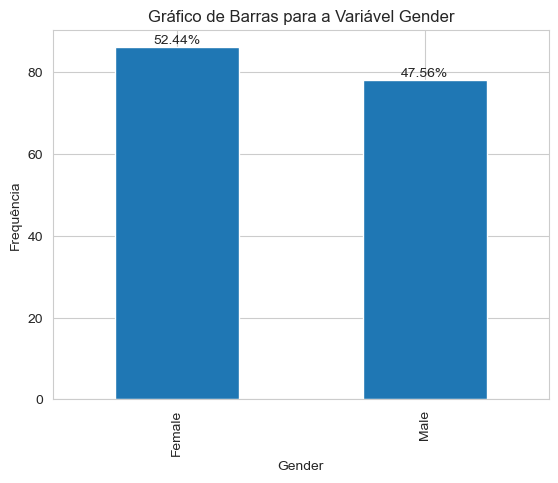

In [181]:
#seu código aqui
# Distribuição de clientes por gênero:
contagem_gender = df['Gender'].value_counts()
porcentagem_gender = (contagem_gender / contagem_gender.sum()) * 100

ax = contagem_gender.plot(kind='bar')

for i, v in enumerate(contagem_gender):
    ax.text(i, v + 1, f'{porcentagem_gender.iloc[i]:.2f}%', ha='center')
plt.title('Gráfico de Barras para a Variável Gender')
plt.xlabel('Gender')
plt.ylabel('Frequência')

plt.show()

# Essa variável é bem distribuída, de forma quase igual entre homens e mulheres.

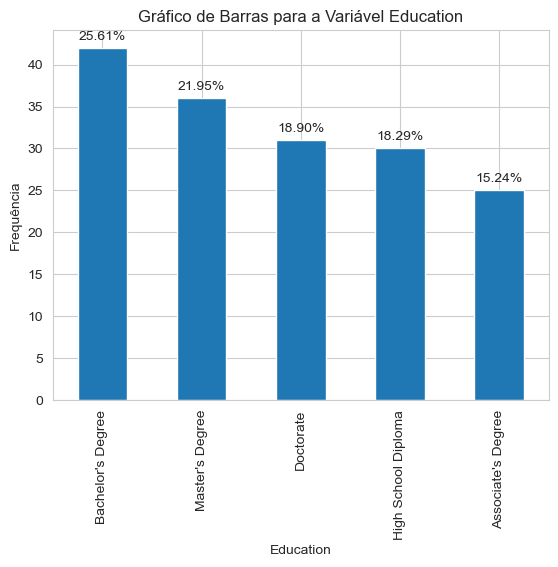

In [182]:
# Distribuição de clientes por nível de educação:
contagem_education = df['Education'].value_counts()
porcentagem_education = (contagem_education / contagem_education.sum()) * 100

ax = contagem_education.plot(kind='bar')

for i, v in enumerate(contagem_education):
    ax.text(i, v + 1, f'{porcentagem_education.iloc[i]:.2f}%', ha='center')
plt.title('Gráfico de Barras para a Variável Education')
plt.xlabel('Education')
plt.ylabel('Frequência')

plt.show()

# A variável education é bem distribuída. Observa-se predominância de clientes com bacharelado e uma menor quantidade de clientes com diploma de associado, ou seja, formados, porém em cursos com duração média de 2 anos.

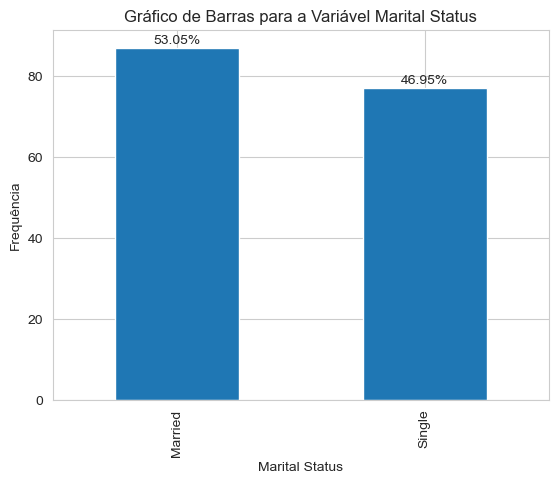

In [183]:
# Distribuição de clientes por estado civil:
contagem_marital_status = df['Marital Status'].value_counts()
porcentagem_marital_status = (contagem_marital_status / contagem_marital_status.sum()) * 100

ax = contagem_marital_status.plot(kind='bar')

for i, v in enumerate(contagem_marital_status):
    ax.text(i, v + 1, f'{porcentagem_marital_status.iloc[i]:.2f}%', ha='center')
plt.title('Gráfico de Barras para a Variável Marital Status')
plt.xlabel('Marital Status')
plt.ylabel('Frequência')

plt.show()

# Assim como a variável Gender, é bem distribuída, com aproximadamente 53% de clientes casados e 47% de clientes solteiros.

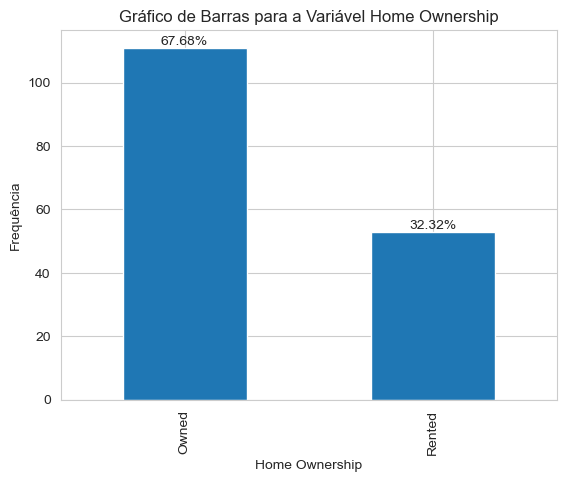

In [184]:
# Distribuição de clientes por posse de casa:
contagem_home_ownership = df['Home Ownership'].value_counts()
porcentagem_home_ownership = (contagem_home_ownership / contagem_home_ownership.sum()) * 100

ax = contagem_home_ownership.plot(kind='bar')

for i, v in enumerate(contagem_home_ownership):
    ax.text(i, v + 1, f'{porcentagem_home_ownership.iloc[i]:.2f}%', ha='center')
plt.title('Gráfico de Barras para a Variável Home Ownership')
plt.xlabel('Home Ownership')
plt.ylabel('Frequência')

plt.show()

# Essa variável não é tão bem distribuída como a Gender e Marital Status. Visto que, aproximadamente 2 terços dos clientes possuem casa própria e apenas 32,32% dos clientes moram em casas alugadas.

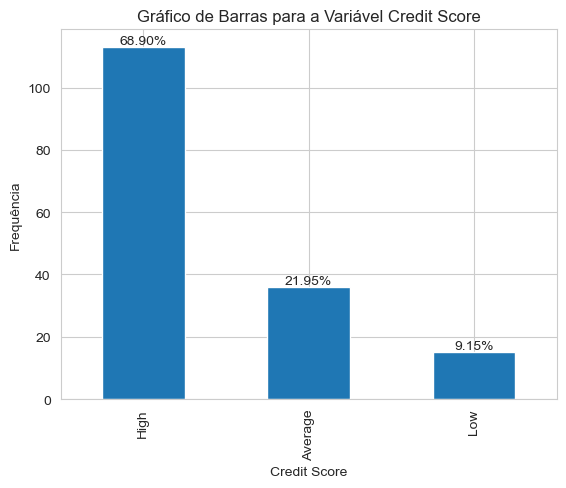

In [185]:
# Distribuição de clientes por pontuação de crédito:
contagem_credit_score = df['Credit Score'].value_counts()
porcentagem_credit_score = (contagem_credit_score / contagem_credit_score.sum()) * 100

ax = contagem_credit_score.plot(kind='bar')

for i, v in enumerate(contagem_credit_score):
    ax.text(i, v + 1, f'{porcentagem_credit_score.iloc[i]:.2f}%', ha='center')
plt.title('Gráfico de Barras para a Variável Credit Score')
plt.xlabel('Credit Score')
plt.ylabel('Frequência')

plt.show()

# Observa-se que a maioria dos clientes, 68,9%, possuem Credit Score alto. E que apenas 9,15% possuem Credit Score Baixo.

**C) Você encontrou alguma coluna com outliers?
Se sim realize o tratamento desses casos.**

In [186]:
#seu código aqui
# Ao rodar o boxplot da variável number of children, o número 3 foi considerado como um outlier, porém, conforme explicado anteriormente, essa variável não foi tratado, por ser um valor próximo aos demais.

**D) Realize a análise Bivariada.
Tente responder as seguintes perguntas com gráficos seguidos de insights:**



*   Existe relação entre a idade e o status civil?
*   Qual a relação entre o score de crédito e o nível de escolaridade?
*  O salário parece influenciar na idade?
* O salário parece influenciar no Score de Crédito?
* Clientes com casa própria tendem a ter um score mais alto?



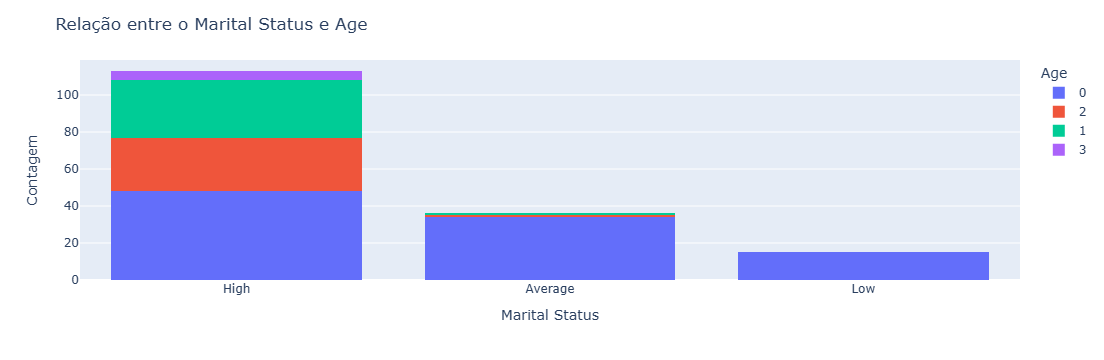

In [187]:
#seu código aqui
# Relação idade e status civil
order = df.groupby('Marital Status')['Age'].mean().sort_values(ascending=False).index


fig.update_layout(title='Relação entre o Marital Status e Age',
                  xaxis_title='Marital Status',
                  yaxis_title='Contagem',
                  legend_title='Age')
fig.show()

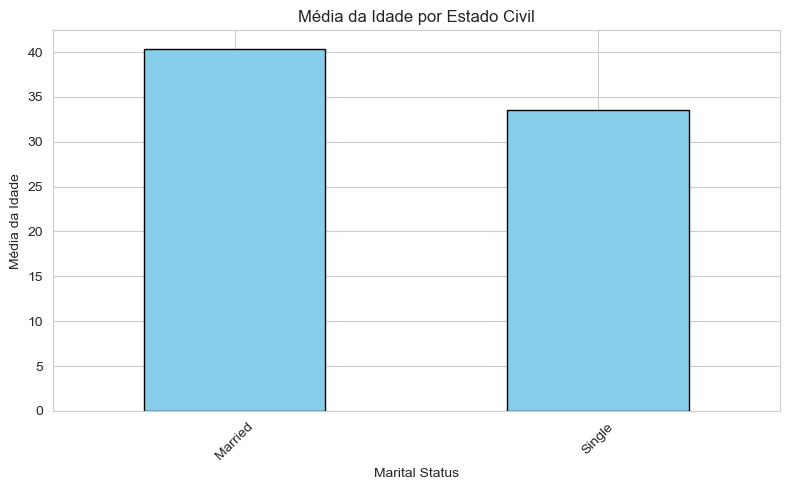

In [188]:
df.groupby('Marital Status')['Age'].mean().plot(kind='bar',color='skyblue',edgecolor='black',figsize=(8, 5))

plt.title('Média da Idade por Estado Civil')
plt.xlabel('Marital Status')
plt.ylabel('Média da Idade')
plt.xticks(rotation=45)  
plt.tight_layout()
plt.show()

# Pode-se observar que a média de idade dos clientes casados é superior à dos clientes solteiros.

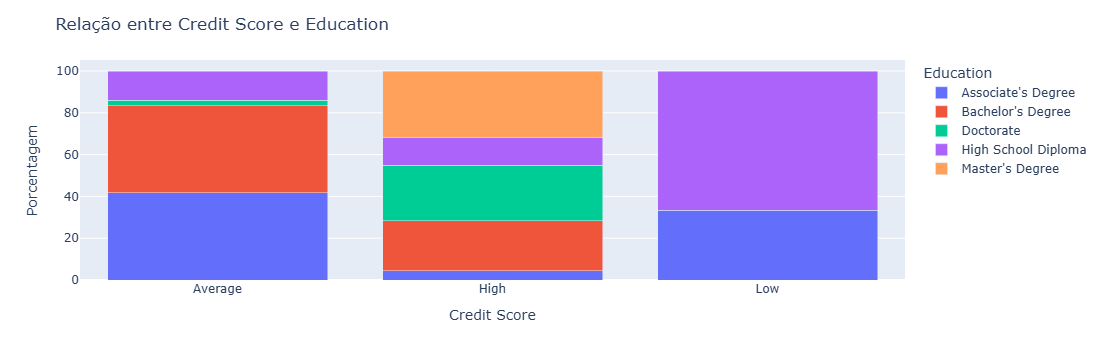

In [189]:
df_grouped = df.groupby(['Credit Score', 'Education']).size().reset_index(name='count')
total_por_credit_score = df_grouped.groupby('Credit Score')['count'].transform('sum')
df_grouped['percent'] = (df_grouped['count'] / total_por_credit_score) * 100
fig = px.bar(df_grouped, x='Credit Score', y='percent', color='Education', barmode='stack',
             labels={'Credit Score': 'Credit Score', 'percent': 'Porcentagem', 'Education': 'Education'})

fig.update_layout(title='Relação entre Credit Score e Education',
                  yaxis_title='Porcentagem',
                  legend_title='Education')
fig.show()

# Pode-se observar uma relação positiva entre o nível de educação e o score de crédito, visto que a maioria dos clientes com credit score baixo possuem apenas o diploma do ensino médio ou diploma de associado. Enquanto os clientes com credit score alto predominantemente possuem doutorado, mestrado ou bacharelado.

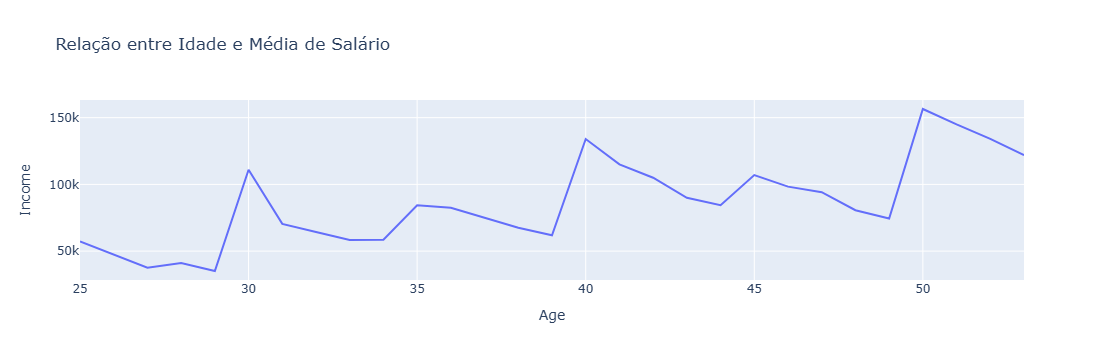

In [190]:
# Relação entre salário e idade
media_salario_por_idade = df.groupby('Age')['Income'].mean().reset_index()

fig = px.line(media_salario_por_idade, x='Age', y='Income',
              title='Relação entre Idade e Média de Salário',
              labels={'Age': 'Age', 'Income': 'Income'})

fig.show()

# A idade parece influenciar positivamente o salário mensal, visto que as menores médias de salário são dos clientes mais jovens. Já os clientes mais velhos têm médias salariais maiores.

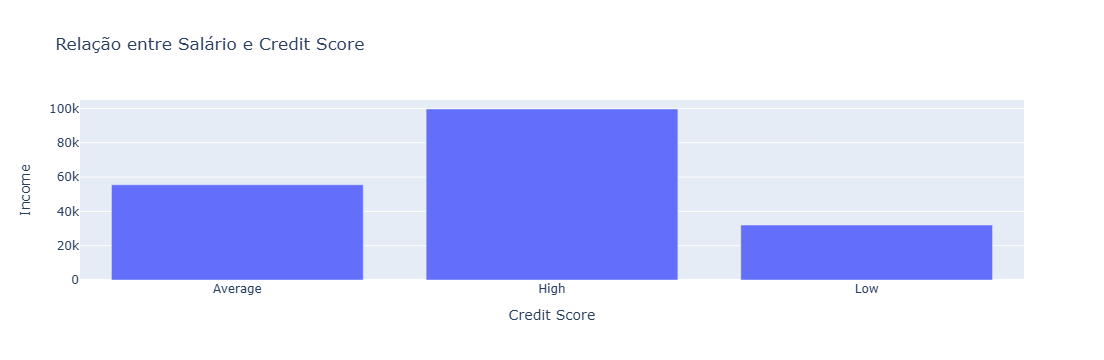

In [191]:
# Relação entre Salário e Credit Score
media_salario_por_credit_score = df.groupby('Credit Score')['Income'].mean().reset_index()
fig = px.bar(media_salario_por_credit_score, x='Credit Score', y='Income',
             title='Relação entre Salário e Credit Score')
fig.show()

# O salário parece influenciar o score de crédito, visto que os clientes com baixo score possuem média salarial de 32 mil. Os clientes com score médio possuem salários médios de 55,5 mil. Já os clientes com alto score possuem médias salariais acima de 99 mil.

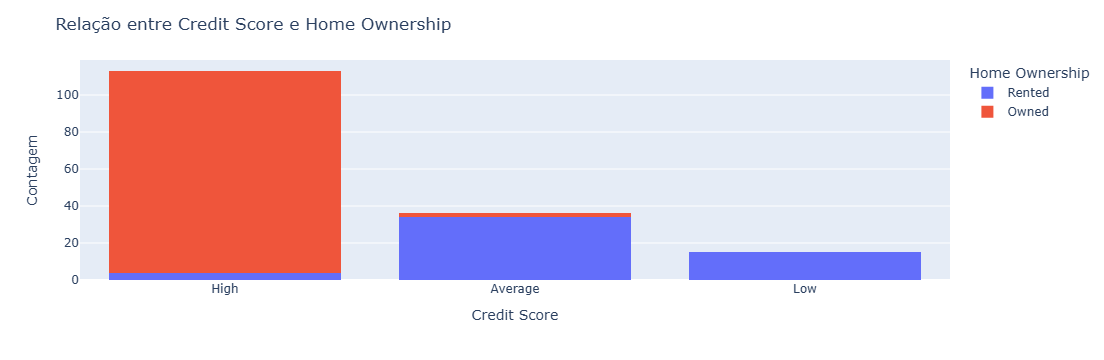

In [192]:
# Relação entre Home Ownership e Credit Score
fig = px.histogram(df, x='Credit Score', color='Home Ownership', barmode='stack')

# Layout
fig.update_layout(title='Relação entre Credit Score e Home Ownership',
                  xaxis_title='Credit Score',
                  yaxis_title='Contagem',
                  legend_title='Home Ownership')
fig.show()

# Sim, clientes que possuem credit score alto predominantemente possuem casa própria, enquanto os clientes que não possuem casa própria tendem a ter credit score baixo ou médio.

**E) Que outras perguntas te parecem fazer sentido explorarmos a resposta para conhecermos mais nossa base de dados e o comportamento dos clientes?**

 Elabore mais 3 perguntas e responda utilizando gráficos + insights.

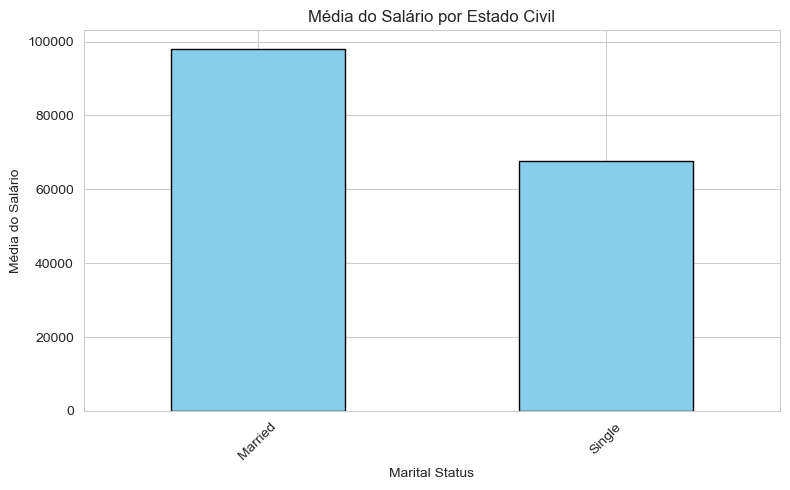

In [193]:
# seu código aqui
# Pergunta 1: Clientes casados tendem a ter salários maiores?
df.groupby('Marital Status')['Income'].mean().plot(kind='bar',color='skyblue',edgecolor='black',figsize=(8, 5))

plt.title('Média do Salário por Estado Civil')
plt.xlabel('Marital Status')
plt.ylabel('Média do Salário')
plt.xticks(rotation=45)  
plt.tight_layout()
plt.show()

# Sim, clientes casados possuem, na média, salários maiores do que os clientes solteiros.

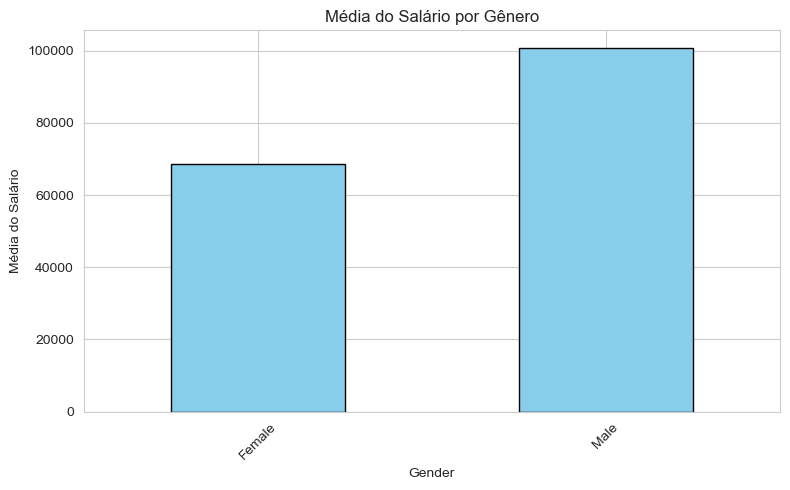

In [194]:
# Pergunta 2: Há diferenciação de salário entre homens e mulheres?
df.groupby('Gender')['Income'].mean().plot(kind='bar',color='skyblue',edgecolor='black',figsize=(8, 5))

plt.title('Média do Salário por Gênero')
plt.xlabel('Gender')
plt.ylabel('Média do Salário')
plt.xticks(rotation=45)  
plt.tight_layout()
plt.show()

# Sim, na média os homens possuem remunerações superiores às mulheres.

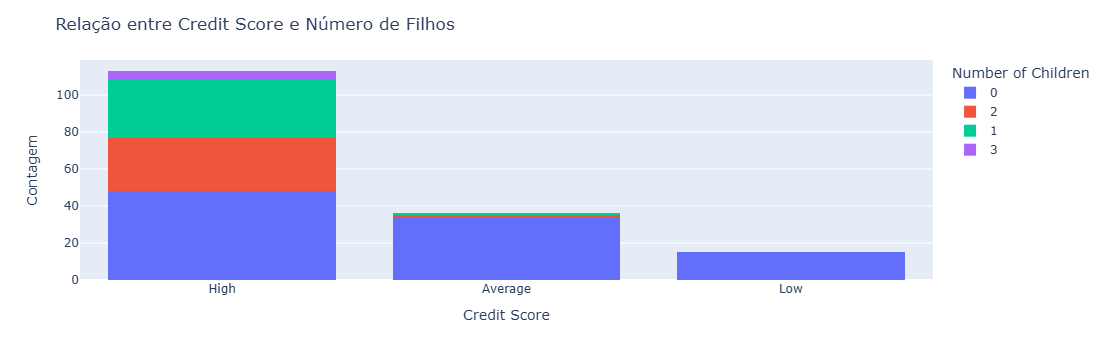

In [195]:
# Pergunta 3: O número de filhos interfere no Credit Score?
fig = px.histogram(df, x='Credit Score', color='Number of Children', barmode='stack')

# Layout
fig.update_layout(title='Relação entre Credit Score e Número de Filhos',
                  xaxis_title='Credit Score',
                  yaxis_title='Contagem',
                  legend_title='Number of Children')
fig.show()

# Parece haver relação positiva entre o número de filhos e o score de crédito. Quase a totalidade dos clientes com baixa ou média pontuação de crédito. Já nos clientes com alto score mais da metade, 57,5%, possuem ao menos um filho.

# Etapa 3: Relize os passos que vimos no módulo 17, de Correlação, Balanceamento, atributos categóricos e divisão base treino e teste.

**A) Vamos começar pela análise de correlação, plote da forma que achar melhor a análise de correlação, seja pela tabela ou pelo gráfico da matriz.**

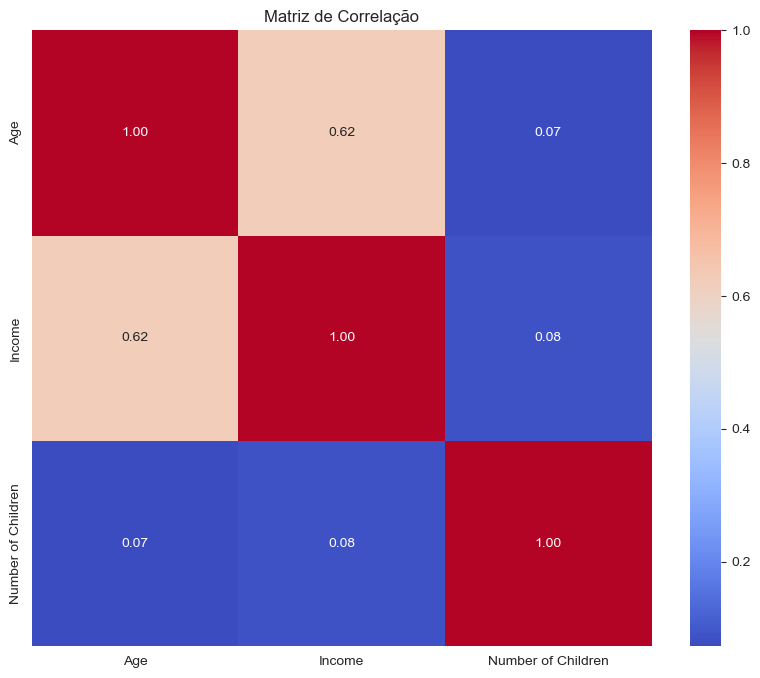

In [196]:
#seu código aqui
correlation_matrix = df.select_dtypes(include=['number']).corr()
plt.figure(figsize=(10, 8))
sns.heatmap(correlation_matrix, annot=True, cmap='coolwarm', fmt=".2f", annot_kws={"size": 10})
plt.title('Matriz de Correlação')
plt.show()

**B) Você encontrou variáveis que tem uma média ou alta correlação? Se sim, quais? Te parece fazer sentido essas variáveis terem alta correlação? Justifique.**

In [197]:
# sua justificativa aqui
# A maioria das variáveis são categóricas, as únicas numéricas são: idade, salário e número de filhos. Em relação às variáveis numéricas:
# Sim, pode-se observar uma alta correlação positiva entre idade e salário, indicando que pessoas mais velhas tendem a ter salários maiores.
# O número de filhos não parece ter alta correlação com as demais variáveis.

**C) Temos muitos atributos categóricos nessa base, não? Vamos realizar a o tratamento desses atributos utilizando Label Encoder ou one hot. Após, exclua as colunas categóricas.**

In [198]:
#seu código aqui

# Tratamento variável Gender
# É uma variável com poucas categorias e não há relação de ordem, portanto, será utilizada a técnica One Hot Encoder, eliminando a primeira coluna de modo a evitar multicolineridade.
df = pd.get_dummies(df, columns=['Gender'], prefix='Gender', drop_first=True)

In [199]:
# Tratamento variável Education
# Essa variável possui mais categorias e há relação de ordem entre os níveis de educação, portanto, será utilizada a técnica Label Encoder
from sklearn.preprocessing import LabelEncoder
label_encoder = LabelEncoder()
df['Education_encoded'] = label_encoder.fit_transform(df['Education'])

In [200]:
# Tratamento variável Marital Status
# É uma variável com poucas categorias e não há relação de ordem, portanto, será utilizada a técnica One Hot Encoder, eliminando a primeira coluna de modo a evitar multicolineridade.
df = pd.get_dummies(df, columns=['Marital Status'], prefix='Marital Status', drop_first=True)

In [201]:
# Tratamento variável Home Ownership
# É uma variável com poucas categorias e não há relação de ordem, portanto, será utilizada a técnica One Hot Encoder, eliminando a primeira coluna de modo a evitar multicolineridade.
df = pd.get_dummies(df, columns=['Home Ownership'], prefix='Home Ownership', drop_first=True)

In [202]:
# Tratamento variável Credit Score
# Essa variável possui relação de ordem entre os tipos de score de crédito, desse modo, será utilizada a técnica Label Encoder
df['Credit Score_encoded'] = label_encoder.fit_transform(df['Credit Score'])

In [203]:
# Vamos analisar como ficou antes de excluirmos
df.head

<bound method NDFrame.head of      Age    Income            Education  Number of Children Credit Score  \
0     25   50000.0    Bachelor's Degree                   0         High   
1     30  100000.0      Master's Degree                   2         High   
2     35   75000.0            Doctorate                   1         High   
3     40  125000.0  High School Diploma                   0         High   
4     45  100000.0    Bachelor's Degree                   3         High   
..   ...       ...                  ...                 ...          ...   
159   29   27500.0  High School Diploma                   0          Low   
160   34   47500.0   Associate's Degree                   0      Average   
161   39   62500.0    Bachelor's Degree                   2         High   
162   44   87500.0      Master's Degree                   0         High   
163   49   77500.0            Doctorate                   1         High   

     Gender_Male  Education_encoded  Marital Status_Singl

In [204]:
# Note que as primeiras colunas que representavam o Credit Score - High agora resultam em 1. O que parece um pouco estranho, visto que a ideia seria colocar em ordem, sendo: 
# LOW < AVERAGE < HIGH
# Para ajustar isso substituiremos a técnica pela Ordinal Encoder.
from sklearn.preprocessing import OrdinalEncoder
ordinal_encoder = OrdinalEncoder(categories=[['Low', 'Average', 'High']])
df['Credit Score_ordinal_encoded'] = ordinal_encoder.fit_transform(df[['Credit Score']])
df.head

<bound method NDFrame.head of      Age    Income            Education  Number of Children Credit Score  \
0     25   50000.0    Bachelor's Degree                   0         High   
1     30  100000.0      Master's Degree                   2         High   
2     35   75000.0            Doctorate                   1         High   
3     40  125000.0  High School Diploma                   0         High   
4     45  100000.0    Bachelor's Degree                   3         High   
..   ...       ...                  ...                 ...          ...   
159   29   27500.0  High School Diploma                   0          Low   
160   34   47500.0   Associate's Degree                   0      Average   
161   39   62500.0    Bachelor's Degree                   2         High   
162   44   87500.0      Master's Degree                   0         High   
163   49   77500.0            Doctorate                   1         High   

     Gender_Male  Education_encoded  Marital Status_Singl

In [205]:
# Após isso vamos excluir a coluna com Label Encoder e transformar a nova em int.
df = df.drop('Credit Score_encoded', axis=1)

In [206]:
df['Credit Score_ordinal_encoded'] = df['Credit Score_ordinal_encoded'].astype(int)

In [207]:
df.dtypes

Age                               int32
Income                          float64
Education                        object
Number of Children                int64
Credit Score                     object
Gender_Male                        bool
Education_encoded                 int32
Marital Status_Single              bool
Home Ownership_Rented              bool
Credit Score_ordinal_encoded      int32
dtype: object

In [208]:
df.head

<bound method NDFrame.head of      Age    Income            Education  Number of Children Credit Score  \
0     25   50000.0    Bachelor's Degree                   0         High   
1     30  100000.0      Master's Degree                   2         High   
2     35   75000.0            Doctorate                   1         High   
3     40  125000.0  High School Diploma                   0         High   
4     45  100000.0    Bachelor's Degree                   3         High   
..   ...       ...                  ...                 ...          ...   
159   29   27500.0  High School Diploma                   0          Low   
160   34   47500.0   Associate's Degree                   0      Average   
161   39   62500.0    Bachelor's Degree                   2         High   
162   44   87500.0      Master's Degree                   0         High   
163   49   77500.0            Doctorate                   1         High   

     Gender_Male  Education_encoded  Marital Status_Singl

In [209]:
# Transformação das colunas booleanas
for column in df.columns:
    if df[column].dtype == 'bool':
        df[column] = df[column].astype(int)
print(df)

     Age    Income            Education  Number of Children Credit Score  \
0     25   50000.0    Bachelor's Degree                   0         High   
1     30  100000.0      Master's Degree                   2         High   
2     35   75000.0            Doctorate                   1         High   
3     40  125000.0  High School Diploma                   0         High   
4     45  100000.0    Bachelor's Degree                   3         High   
..   ...       ...                  ...                 ...          ...   
159   29   27500.0  High School Diploma                   0          Low   
160   34   47500.0   Associate's Degree                   0      Average   
161   39   62500.0    Bachelor's Degree                   2         High   
162   44   87500.0      Master's Degree                   0         High   
163   49   77500.0            Doctorate                   1         High   

     Gender_Male  Education_encoded  Marital Status_Single  \
0              0         

In [210]:
# Exclusão da coluna Education e Credit Score
df = df.drop('Education', axis=1)
df = df.drop('Credit Score', axis=1)
print(df)

     Age    Income  Number of Children  Gender_Male  Education_encoded  \
0     25   50000.0                   0            0                  1   
1     30  100000.0                   2            1                  4   
2     35   75000.0                   1            0                  2   
3     40  125000.0                   0            1                  3   
4     45  100000.0                   3            0                  1   
..   ...       ...                 ...          ...                ...   
159   29   27500.0                   0            0                  3   
160   34   47500.0                   0            1                  0   
161   39   62500.0                   2            0                  1   
162   44   87500.0                   0            1                  4   
163   49   77500.0                   1            0                  2   

     Marital Status_Single  Home Ownership_Rented  \
0                        1                      1   
1    

**D) Vamos plotar novamente a correlação, agora observando com as variáveis categóricas. Identifique se temos novas variáveis com forte correlação.**

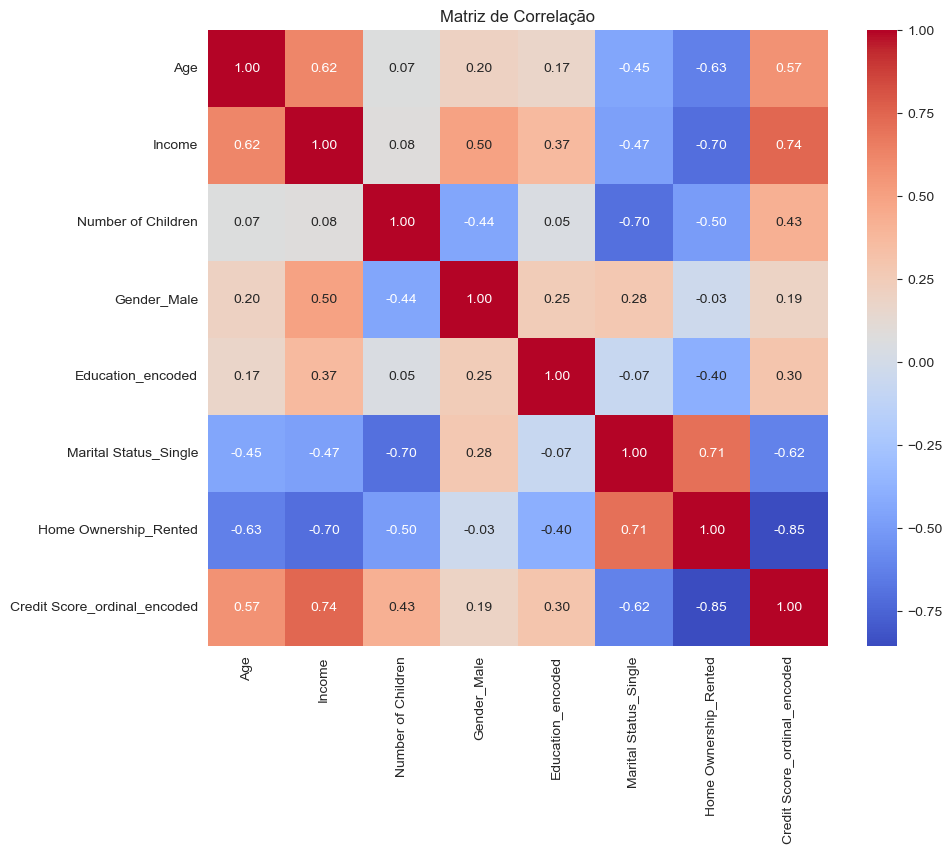

In [211]:
#seu código aqui
correlation_matrix = df.select_dtypes(include=['number']).corr()
plt.figure(figsize=(10, 8))
sns.heatmap(correlation_matrix, annot=True, cmap='coolwarm', fmt=".2f", annot_kws={"size": 10})
plt.title('Matriz de Correlação')
plt.show()

# Variável gênero masculino: alta correlação positiva com salário e negativa com número de filhos
# Variável educação: alta correlação positiva com salário e negativa com casa alugada. Ou seja, quanto maior o nível de educação maior tende a ser o salário e maiores as chances do cliente possuir casa própria.
# Variável estado civil solteiro: alta correlação negativa com número de filhos, salário e idade. E alta correlação positiva com casa alugada. 
# Variável casa alugada: alta correlação negativa com idade, salário, número de filhos, nível de educação e credit score. Alta correlação positiva com a variável estado civil solteiro.
# Variável score de crédito: alta correlação positiva com salário, idade, número de filhos. Alta correlação negativa com estado civil solteiro e casa alugada.

# Sobre o Credit Score, a partir da matriz de correlação, é possível obter alguns insights iniciais:
# 1) Quanto maior o score maior tende a ser o nível de educação e idade, variáveis ligadas ao salário
# 2) Clientes solteiros e que não possuem casa própria tendem a ter credit score mais baixo. Lembrando que essas variáveis estão fortemente correlacionadas negativamente com o salário.


**F) Faça a separação da base em treino e teste e verifique utilizando shape:**

In [214]:
#seu código aqui
# Credit Score é a variável a ser predita, portanto, iremos separá-la
X = df.drop('Credit Score_ordinal_encoded', axis=1) 
y = df['Credit Score_ordinal_encoded']

In [215]:
from sklearn.model_selection import train_test_split

In [216]:
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.25, random_state=42)

In [217]:
X_train

,Age,Income,Number of Children,Gender_Male,Education_encoded,Marital Status_Single,Home Ownership_Rented
141,26,45000.0,0,0,0,1,1
117,29,27500.0,0,0,3,1,1
93,25,62500.0,0,0,1,1,1
133,29,68000.0,2,0,2,0,0
36,31,65000.0,0,1,1,1,1
...,...,...,...,...,...,...,...
71,46,97500.0,1,0,3,0,0
106,32,57500.0,0,1,0,1,1
14,36,70000.0,2,0,1,0,0
92,36,85000.0,1,0,2,0,0


In [218]:
X_test

,Age,Income,Number of Children,Gender_Male,Education_encoded,Marital Status_Single,Home Ownership_Rented
135,25,55000.0,0,0,1,1,1
115,48,87500.0,1,0,2,0,0
131,26,55000.0,1,0,1,0,0
55,39,62500.0,2,0,1,0,0
95,35,90000.0,1,0,2,0,0
29,25,55000.0,0,0,1,1,1
157,48,82500.0,1,0,2,0,0
51,48,82500.0,1,0,2,0,0
101,36,95000.0,2,0,4,0,0
145,36,95000.0,1,0,3,0,0


In [219]:
y_train

141    1
117    0
93     1
133    1
36     1
      ..
71     2
106    1
14     2
92     2
102    2
Name: Credit Score_ordinal_encoded, Length: 123, dtype: int32

In [220]:
y_test

135    1
115    2
131    1
55     2
95     2
29     1
157    2
51     2
101    2
145    2
19     1
85     0
15     2
66     2
24     0
30     2
132    2
105    0
152    2
16     2
75     2
18     0
12     0
9      2
31     2
155    2
98     2
56     2
134    2
160    1
139    2
78     2
60     2
84     2
2      2
94     2
45     2
42     1
69     2
153    0
26     2
Name: Credit Score_ordinal_encoded, dtype: int32

In [221]:
print("Tamanho de X_train:", X_train.shape)
print("Tamanho de X_test:", X_test.shape)
print("Tamanho de y_train:", y_train.shape)
print("Tamanho de y_test:", y_test.shape)

Tamanho de X_train: (123, 7)
Tamanho de X_test: (41, 7)
Tamanho de y_train: (123,)
Tamanho de y_test: (41,)


**G) É hora de verificar se nossa coluna de Score de crédito está balanceada, verifique através de um gráfico e traga sua opinião acerca do balanceamento.**

<Axes: xlabel='Credit Score_ordinal_encoded'>

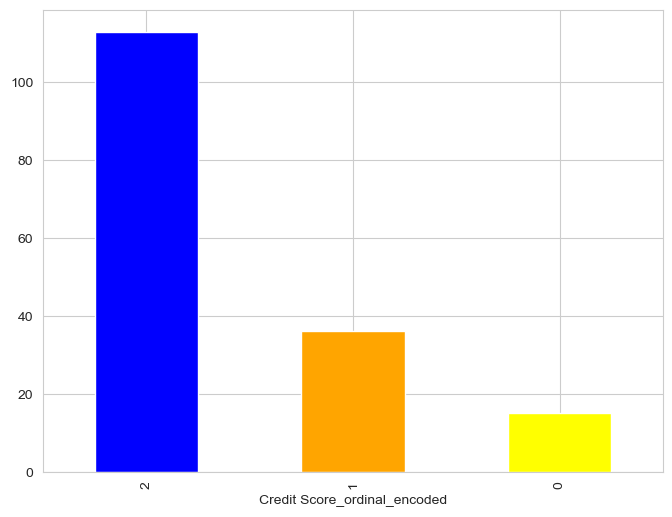

In [223]:
#seu código aqui
credit_score_encoded_counts = df['Credit Score_ordinal_encoded'].value_counts()
plt.figure(figsize=(8, 6))
credit_score_encoded_counts.plot(kind='bar', color=['blue', 'orange', 'yellow'])

In [225]:
# Calcular e imprimir as porcentagens dos valores na coluna 'churn'
print((df['Credit Score_ordinal_encoded'].value_counts(normalize=True) * 100))

Credit Score_ordinal_encoded
2    68.902439
1    21.951220
0     9.146341
Name: proportion, dtype: float64


In [ ]:
# Mais de dois terços dos clientes da base possuem credit score alto, o que demonstra que a coluna está desbalanceada.

**H) Vamos realizar o balancecamento dos dados da coluna de credit score.**
Se lembre que realizazmos apenas para a base de treino.

In [226]:
#seu código aqui
from imblearn.over_sampling import SMOTE

# Criar uma instância do SMOTE
smote = SMOTE(random_state=42)

# Aplicar o SMOTE aos dados de treinamento (X_train, y_train)
X_train_balanced, y_train_balanced = smote.fit_resample(X_train, y_train)

# Verificar a distribuição das classes após o balanceamento
print("Distribuição das classes após o balanceamento:")
print(y_train_balanced.value_counts())

Distribuição das classes após o balanceamento:
Credit Score_ordinal_encoded
1    84
0    84
2    84
Name: count, dtype: int64


In [227]:
train_balance = y_train_balanced.value_counts()
print("Balanceamento em y_train:")
print(train_balance)

Balanceamento em y_train:
Credit Score_ordinal_encoded
1    84
0    84
2    84
Name: count, dtype: int64


In [228]:
# Salvar em csv
y_train_balanced.to_csv('y_train_balanced.csv', index=False)
X_train_balanced.to_csv('X_train_balanced.csv', index=False)
y_test.to_csv('y_test.csv', index=False)
X_test.to_csv('X_test.csv', index=False)